In [1]:
import torch
import torchvision
from femb.data.util import http_get, extract_archive
from femb.backbones import build_backbone
from femb.headers import LinearHeader, SphereFaceHeader, CosFaceHeader, ArcFaceHeader, MagFaceHeader
from femb.evaluation import VerificationEvaluator
from femb.data import LFWDataset, CelebADataset
from femb import FaceEmbeddingModel
from femb.preprocess.face_detection import preprocess_image
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

/home/ysyuk/Broj/pt-femb-face-embeddings/femb/data/util.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


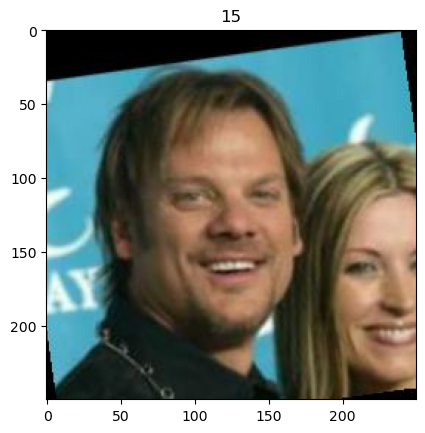

In [2]:
train_dataset = LFWDataset(split='train', aligned=True)
visualized_img = train_dataset[22]
plt.imshow(visualized_img[0])
plt.title(visualized_img[1])
plt.show()

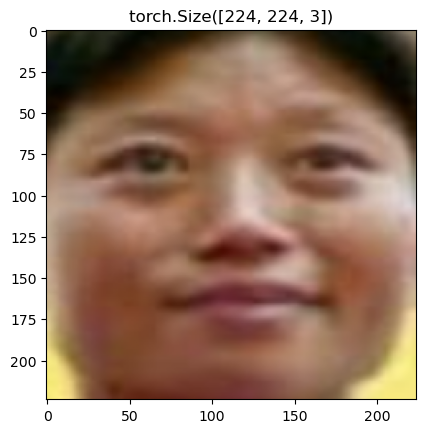

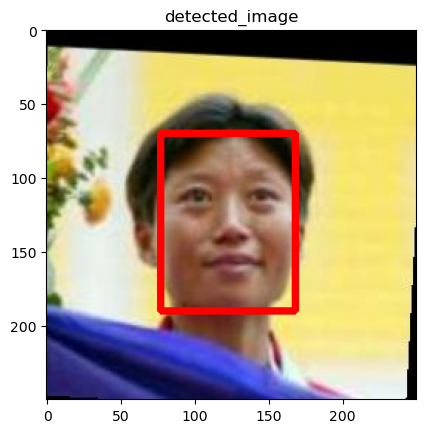

[tensor([[[0.2745, 0.2706, 0.2588,  ..., 0.5647, 0.5725, 0.5765],
         [0.2706, 0.2667, 0.2510,  ..., 0.5569, 0.5647, 0.5686],
         [0.2588, 0.2549, 0.2392,  ..., 0.5412, 0.5529, 0.5569],
         ...,
         [0.9608, 0.9647, 0.9686,  ..., 0.9686, 0.9725, 0.9725],
         [0.9569, 0.9608, 0.9647,  ..., 0.9725, 0.9725, 0.9725],
         [0.9569, 0.9569, 0.9647,  ..., 0.9725, 0.9725, 0.9725]],

        [[0.2510, 0.2471, 0.2353,  ..., 0.5137, 0.5176, 0.5216],
         [0.2471, 0.2431, 0.2314,  ..., 0.5059, 0.5137, 0.5176],
         [0.2392, 0.2353, 0.2235,  ..., 0.4980, 0.5059, 0.5098],
         ...,
         [0.9176, 0.9176, 0.9216,  ..., 0.9098, 0.9137, 0.9137],
         [0.9137, 0.9137, 0.9176,  ..., 0.9137, 0.9137, 0.9137],
         [0.9098, 0.9098, 0.9176,  ..., 0.9137, 0.9137, 0.9137]],

        [[0.1490, 0.1451, 0.1412,  ..., 0.4157, 0.4157, 0.4157],
         [0.1529, 0.1529, 0.1451,  ..., 0.4157, 0.4157, 0.4157],
         [0.1608, 0.1608, 0.1490,  ..., 0.4118, 0.4118, 0

In [7]:
preprocess = preprocess_image
preprocess_dataset = LFWDataset(split='train', aligned=True, preprocess=preprocess)

print(preprocess_dataset[3][0])



In [ ]:
batch_size = 32 
device = 'cuda'

In [ ]:
# preprocessing transform (assuming alignment and so on)
# transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToPILImage()
#     # torchvision.transforms.Resize((224, 224)),
#     # # torchvision.transforms.Resize((112, 112)),
#     # torchvision.transforms.ToTensor(),
#     # # torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
#     # torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     # torchvision.transforms.RandomHorizontalFlip()
#     ])

preprocess = preprocess_image
train_dataset = LFWDataset(split='train', aligned=True, preprocess=preprocess)

print(train_dataset[2][0])
# plt.imshow(train_dataset[2][0])
# plt.show()
batch_size = 32 
device = 'cuda'
# train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))
# for step, batch in pbar:

#     # # skip batch if singleton
#     # if len(batch[0]) <= 1:
#     #     continue

#     inputs = batch[0]
#     labels = batch[1]
#     print(type(inputs))
#     plt.imshow(inputs[0])
#     plt.title(labels[0])
#     plt.show()
#     # 배치의 이미지 텐서를 (B, C, H, W) 형식으로 변환
#     inputs = inputs.permute(0, 3, 1, 2)  # (B, H, W, C) -> (B, C, H, W)
#     # 첫 번째 이미지 텐서를 PIL 이미지로 변환
#     pil_image = torchvision.transforms.ToPILImage()(inputs[0].cpu())

#     tensor_img,_ = face_detection.preprocess_image(np.array(pil_image))

#     # plt.imshow(inputs[0])
#     # plt.title(labels[0])
#     # plt.show()

#     print(step)
#     if step == 1:
#         break